<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Statistics Fundamentals

---

<a id="learning-objectives"></a>
## Learning Objectives
- Compute dot products, matrix multiplications, and vector norms by hand and using NumPy.
- Code summary statistics using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.
- Create basic data visualizations, including scatterplots, box plots, and histograms.
- Describe characteristics and trends in a data set using visualizations.
- Describe the bias and variance of statistical estimators.
- Identify a normal distribution within a data set using summary statistics and data visualizations.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import math
import matplotlib.pyplot as plt

#ipywidgets used to interact with graphs
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline

<a id="where-are-we-in-the-data-science-workflow"></a>
## Where are we in the data science workflow?

![Data Science Workflow](./assets/images/data-science-workflow.png)

<a id="linear-algebra-review"></a>
## 1. Linear Algebra Review

### 1.1 What is linear algebra?

Linear algebra is the branch of mathematics that deals with linear equations, including the use of vectors and matrices to solve linear problems in high dimensional space. 

Linear algebra is a need-to-know subject for machine learning. In fact, it forms the basis of foundational models such as linear regression, logistic regression, and principal component analysis (PCA). 

Unsurprisingly, advanced models such as neural networks and support vector machines rely on linear algebra as their "trick" for impressive speedups. Modern-day GPUs are essentially linear algebra supercomputers. And, to utilize their power on a GPU, models must often be carefully formulated in terms of vectors and matrices.

More than that, today's advanced models build upon the simpler foundational models. Each neuron in a neural net is essentially a logistic regressor! Support vector machines utilize a kernel trick to craftily make problems linear that would not otherwise appear to be.

Although we do not have time in this course to comprehensively discuss linear algebra, we highly recommend you become fluent!


<a id="scalars-vectors-and-matrices"></a>
### 1.2 Scalars, Vectors, and Matrices

A **scalar** is a single number. Here, symbols that are lowercase single letters refer to scalars. For example, the symbols $a$ and $v$ are scalars that might refer to arbitrary numbers such as $5.328$ or $7$. An example scalar would be:

$$a$$

A **vector** is an ordered sequence of numbers. Here, symbols that are lowercase single letters with an arrow — such as $\vec{u}$ — refer to vectors. An example vector would be:

$$\vec{u} = \left[ \begin{array}{c}
1&3&7
\end{array} \right]$$

We can represent vectors using numpy arrays.

In [2]:
u = np.array([1, 3, 7])
u

array([1, 3, 7])

In [3]:
type(u)

numpy.ndarray

An $m$ x $n$ **matrix** is a rectangular array of numbers with $m$ rows and $n$ columns. Each number in the matrix is an entry. Entries can be denoted $a_{ij}$, where $i$ denotes the row number and $j$ denotes the column number. Note that, because each entry $a_{ij}$ is a lowercase single letter, a matrix is an array of scalars:

$$\mathbf{A}= \left[ \begin{array}{c}
a_{11} & a_{12} & ... & a_{1n}  \\
a_{21} & a_{22} & ... & a_{2n}  \\
... & ... & ... & ... \\
a_{m1} & a_{m2} & ... & a_{mn}
\end{array} \right]$$

Matrices are referred to using bold uppercase letters, such as $\mathbf{A}$. 

In [4]:
m = np.array([[1, 3, 7], [4, 6, 3], [2, 5, 6]])
m

array([[1, 3, 7],
       [4, 6, 3],
       [2, 5, 6]])

Note that in Python, a matrix is just a list of lists (or an array of arrays)! The outermost list is a list of rows.

<a id="basic-matrix-algebra"></a>
### 1.3 Basic Matrix Algebra


#### Addition and Subtraction
Vector **addition** is straightforward. If two vectors are of equal dimensions (The vectors are shown here as column vectors for convenience only):

$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right],  \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$

In [3]:
v = np.array([1, 3, 7])
w = np.array([1, 0, 1])

$\vec{v} + \vec{w} =
\left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] + \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right] = 
\left[ \begin{array}{c}
1+1 \\
3+0 \\
7+1
\end{array} \right] = 
\left[ \begin{array}{c}
2 \\
3 \\
8
\end{array} \right]
$

(Subtraction is similar.)

In [5]:
v + w

array([2, 3, 8])

#### Scalar Multiplication
We scale a vector with **scalar multiplication**, multiplying a vector by a scalar (single quantity):

$ 2 \cdot \vec{v} = 2\left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] = 
 \left[ \begin{array}{c}
2 \cdot 1 \\
2 \cdot 3 \\
2 \cdot 7
\end{array} \right] = 
 \left[ \begin{array}{c}
2 \\
6 \\
14
\end{array} \right]$ 

In [7]:
2 * np.array([1, 3, 7])

array([ 2,  6, 14])

<a id="dot-product"></a>
### 1.4 Dot Product
The **dot product** of two _n_-dimensional vectors is:

$ \vec{v} \cdot \vec{w} =\sum _{i=1}^{n}v_{i}w_{i}=v_{1}w_{1}+v_{2}w_{2}+\cdots +v_{n}w_{n} $

So, if:

$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right], \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$

$ \vec{v} \cdot \vec{w} = 1 \cdot 1 + 3 \cdot 0 + 7 \cdot 1 = 8 $

In [8]:
v = np.array([1, 3, 7])
w = np.array([1, 0, 1])

# Calculate the dot product of v and w using np.dot.
v.dot(w)

8

<a id="matrix-multiplication"></a>
### 1.5 Matrix Multiplication
**Matrix multiplication**, $\mathbf{A}_{mn}$ x $\mathbf{B}_{ij}$, is valid when the left matrix has the same number of columns as the right matrix has rows ($n = i$). Each entry is the dot product of corresponding row and column vectors.

![](./assets/images/matrix-multiply-a.gif)

The dot product illustrated above is: $1 \cdot 7 + 2 \cdot 9 + 3 \cdot 11 = 58$. Can you compute the rest of the dot products by hand?

If the product is the $2$ x $2$ matrix $\mathbf{C}_{mj}$, then:

+ Matrix entry $c_{12}$ (its FIRST row and SECOND column) is the dot product of the FIRST row of $\mathbf{A}$ and the SECOND column of $\mathbf{B}$.

+ Matrix entry $c_{21}$ (its SECOND row and FIRST column) is the dot product of the SECOND row of $\mathbf{A}$ and the FIRST column of $\mathbf{B}$.

Note that if the first matrix is $m$ x $n$ ($m$ rows and $n$ columns) and the second is  $i$ x $j$ (where $n = i$), then the final matrix will be $m$ x $j$. For example, below we have $2$ x $3$ multiplied by $3$ x $2$, which results in a $2$ x $2$ matrix. Can you see why?

In [9]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8], [9, 10], [11, 12]])

A.dot(B)

array([[ 58,  64],
       [139, 154]])

Make sure you can compute this by hand!

## Exercises

Calculate the following matrix and vector operations **by hand first** and then perform the same calculations using Numpy. 


$$\vec{a} = \left[ \begin{array}{c}
5 \\
8 \\
2
\end{array} \right]\:\: \:\: \vec{b} = \left[ \begin{array}{c}
6 \\
0 \\
5
\end{array} \right]\:\: \:\:\mathbf{C}= \left[ \begin{array}{c}
1 & 7 & 1 \\
7 & 8 & 4
\end{array} \right]\:\: \:\:\mathbf{D}= \left[ \begin{array}{c}
2 & 4 \\
3 & 1 \\
1 & 4
\end{array} \right]$$

(a) $a+b$

(b) $a-b$

(c) $3b$

(d) $a \cdot b$

(e) $C \times D$


In [10]:
a = np.array([5, 8, 2])
b = np.array([6, 0, 5])
C = np.array([[1, 7, 1], [7, 8, 4]])
D = np.array([[2, 4], [3, 1], [1, 4]])

In [11]:
a + b

array([11,  8,  7])

In [12]:
a - b

array([-1,  8, -3])

In [13]:
3 * b

array([18,  0, 15])

In [14]:
a.dot(b)

40

In [15]:
C.dot(D)

array([[24, 15],
       [42, 52]])

<a id="n-dimensional-space"></a>
### 1.6 N-Dimensional Space

We often refer to vectors as elements of an $n$-dimensional space. 

The symbol $\mathbb{R}$ refers to the set of all real numbers (written in uppercase "blackboard bold" font). 

A **real** number is a continuous value that can be represented on a number line. This includes **rational** numbers (any number that can be represented as a fraction) and **irrational** numbers like $\sqrt{2}$. 

For example, $-1$, $3$ and $\pi$ are real numbers, so we can say they are **contained in** $\mathbb{R}$. 

We often write this symbolically as $3 \in \mathbb{R}$ and $\pi \in \mathbb{R}$. 

To get the set of **all** pairs of real numbers, we would essentially take the product of this set with itself (called the Cartesian product) — $\mathbb{R}$ x $\mathbb{R}$, abbreviated as $\mathbb{R}^2$. This set — $\mathbb{R}^2$ — contains all pairs of real numbers, so $(1, 3)$ is **contained in** this set. We write this symbolically as $(1, 3) \in \mathbb{R}^2$.

+ In 2-D space ($\mathbb{R}^2$), a point is uniquely referred to using two coordinates: $(1, 3) \in \mathbb{R}^2$.
+ In 3-D space ($\mathbb{R}^3$), a point is uniquely referred to using three coordinates: $(8, 2, -3) \in \mathbb{R}^3$.
+ In $n$-dimensional space ($\mathbb{R}^n$), a point is uniquely referred to using $n$ coordinates.

Note that these coordinates can be represented as vectors! 

After all, coordinates are ordered sequences of numbers, just as we define vectors to be ordered sequences of numbers. So, especially in machine learning, we often visualize vectors of length $n$ as points in $n$-dimensional space.

<a id="vector-norm"></a>
## Exercise

(a) Draw a set of axes going from 0 to 5 on both the $x$ and $y$ axis

(b) Draw the vector $\vec{v} = \left[ \begin{array}{c}
3 \\
4 
\end{array} \right]$ where the first element in the vector is the $x$ co-ordinate and the second is the $y$ co-ordinate

(c) How can we calculate the length of this vector? Hint: think about Pythagoras!

### 1.7 Vector Norms

The **magnitude** of a vector, $\vec{v} \in \mathbb{R}^{n}$, can be interpreted as its length in $n$-dimensional space, or its distance from the origin.

We've just calculated the magnitude of a 2D vector in the exercises above. For higher dimensional vectors, we take a similar approach. Vector magnitude is calculated using the Euclidean (or straight line) distance from the origin:

$\vec{v} = \left[ \begin{array}{c}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array} \right]$

then $\| \vec{v} \| = \sqrt{v_{1}^{2} + v_{2}^{2} + ... + v_{n}^{2}} = \sqrt{v^Tv}$

E.g. if $\vec{v} = 
\left[ \begin{array}{c}
3 \\
4
\end{array} \right]$, then $\| \vec{v} \| = \sqrt{3^{2} + 4^{2}} = 5$

This is also called the vector **norm**. You will often see this used in machine learning. We can calculate this programmatically with Numpy.


In [16]:
x = np.array([3,4])

# Calculate the norm of the vector x with np.linalg.norm.
np.linalg.norm(x)

5.0

## Exercises

Given a vector $\vec{y} = \left[ \begin{array}{c}
3 \\
4 \\
5 \\
1 \\
2
\end{array} \right]$

(a) Calculate the vector magnitude by hand

(b) Calculate the vector magnitude using Numpy and confirm the two answers are the same

In [2]:
y = np.array([3, 4, 5, 1, 2])
np.linalg.norm(y)

7.416198487095663

<a id="linear-algebra-applications-to-machine-learning"></a>
## 2. Linear Algebra in Machine Learning

<a id="distance-between-actual-values-and-predicted-values"></a>
### 2.1 Distance Between Actual Values and Predicted Values
We often need to know the difference between predicted values and actual values. In 2-D space, we compute this as:
$$\| \vec{actual} - \vec{predicted} \| =\sqrt{(actual_1 - predicted_1)^2 + (actual_2 - predicted_2)^2}$$

<a id="mean-squared-error"></a>
### 2.2 Mean Squared Error
Often, it's easier to look at the mean of the squared errors. Where $\hat{y}(\mathbf{X})$ is a vector of predicted values (a function of the data matrix $\mathbf{X}$) and $\vec{y}$ is the actual values:

$$MSE = \frac{1} {n} \| \hat{y}(\mathbf{X}) - \vec{y} \|^2$$

<a id="least-squares"></a>
### 2.3 Least squares
Many machine learning models are based on the following form:

$$\min \| \hat{y}(\mathbf{X}) - \vec{y} \|$$

The goal is to minimize the distance between model predictions and actual data.

## Exercises

Imagine we've built a model to predict the percentage vote share, in each constituency, for the main opposition party in the next general election. Let's say that for five constituencies, our model predicts the opposition vote share as $\hat{y} = \left[
55,
48,
39,
49,
76
\right]$

Let's assume the actual opposition vote shares in those constituencies turn out to be $y = \left[
50,
47,
39,
52,
77
 \right]$

(a) Referring to the definition of mean squared error above, what's the value of $n$ in this example?

(b) Calculate the magnitude, or vector norm, of $\hat{y}$

(b) Calculate the mean squared error by hand

(c) Fill in the gaps in the code cell below to calculate the mean squared error using scikit-learn

In [9]:
from sklearn.metrics import mean_squared_error

y_predicted = np.array([55, 48, 39, 49, 76])
y_actual = np.array([50, 47, 39, 52, 77])

# Number of data points is 'n'
n = 5

# Vector norm of y_predicted
y_predict_norm = np.linalg.norm(y_predicted)
y_predict_norm

# Vector norm of y_actual
y_actual_norm = np.linalg.norm(y_actual)
y_actual_norm

mean_squared_error(y_actual, y_predicted)

7.2

<a id="descriptive-statistics-fundamentals"></a>
## 3. Descriptive Statistics Fundamentals

### 3.1 A Quick Review of Notation

You'll encounter $\sum$ notation everywhere in machine learning and data science. The sum of a constant $k$, $n$ times
$$\sum_{i=1}^nk$$

It is often helpful to think of these sums as `for` loops. For example, the equation can be compactly computed like so:

```
total = 0

# For i from 1 up to and including n, add k to the sum.
for i in range(1, n+1):
    total += k
```

## Exercises

(a) Compute $\sum_{i=1}^nk$ for $n=5$ and $k=3$

In [2]:
k=3
my_sum = 0

for i in range(1,6):
    print(i)
    my_sum = my_sum + k

print(my_sum)

1
2
3
4
5
15


Code up $$\sum_{i=1}^ni$$ for $n=5$, which is the sum of all numbers from 1 up to and including $n$.


In [3]:
my_sum = 0

for i in range(1,6):
    
    my_sum = my_sum + i
    
print(my_sum)

15


Define a vector $x = [10,3,4,20,3]$ as a Numpy array and compute this for $n=3$, which is the sum of all $x$ from the first $x$ entry to the $n$th $x$ entry:
$$\sum_{i=0}^nx_i$$

In [4]:
x = np.array([10, 3, 4, 20, 3])
my_sum = 0

for i in range(1, 4):
    
    my_sum = my_sum + x[i]
    
print(my_sum)

27


<a id="measures-of-central-tendency"></a>
### 3.2 Measures of Central Tendency

#### Mean
The mean — also known as the average or expected value — is defined as:
$$E[X] = \bar{X} =\frac 1n\sum_{i=1}^nx_i$$

It is determined by summing all data points in a population and then dividing the total by the number of points. The resulting number is known as the mean or the average.

Be careful — the mean can be highly affected by outliers. For example, the mean of a very large number and some small numbers will be much larger than the "typical" small numbers. Earlier, we saw that the mean squared error (MSE) was used to optimize linear regression. Because this mean is highly affected by outliers, the resulting linear regression model is, too.

#### Median
The median refers to the midpoint in a series of numbers. Notice that the median is not affected by outliers, so it more so represents the "typical" value in a set.

$$ 0,1,2,[3],5,5,1004 $$

$$ 1,3,4,[4,5],5,5,7 $$

To find the median:

- Arrange the numbers in order from smallest to largest.
    - If there is an odd number of values, the middle value is the median.
    - If there is an even number of values, the average of the middle two values is the median.

Although the median has many useful properties, the mean is easier to use in optimization algorithms. The median is more often used in analysis than in machine learning algorithms.

#### Mode
The mode of a set of values is the value that occurs most often.
A set of values may have more than one mode, or no mode at all.

$$1,0,1,5,7,8,9,3,4,1$$ 

$1$ is the mode, as it occurs the most often (three times).

## Exercises

(a) Open the CSV file containing the Titanic dataset, from Kaggle: https://www.kaggle.com/c/titanic

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('./data/titanic.csv')
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(b) Calculate the mean and median values of ``fare``

In [35]:
#titanic['fare'].mean()
np.mean(titanic['fare'])

32.2042079685746

In [36]:
#titanic['fare'].median()
np.median(titanic['fare'])

14.4542

(b) The mean and median are quite different. Does this tell you anything about the data? Can we verify this visually?

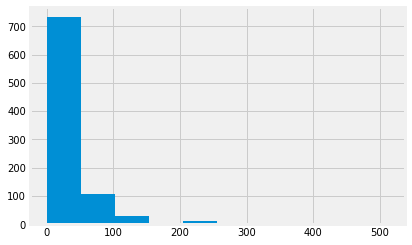

In [35]:
# There must high outliers for the mean to be so much higher than median
# Graph below shows the outliers in '200-300' bin
titanic['fare'].hist();

In [47]:
# To calculate the range of the values in column
np.ptp(titanic['fare'])

512.3292

In [46]:
# Calculate Q1 and Q3 values
q75, q25 = np.percentile(titanic['fare'], [75, 25])

# Calculate IQR value
iqr = q75 - q25
iqr

23.0896

<a id="measures-of-dispersion-standard-deviation-and-variance"></a>
## 3.3 Measures of Dispersion: Standard Deviation and Variance

Standard deviation (SD, $σ$ for population standard deviation, or $s$ for sample standard deviation) is a measure that is used to quantify the amount of variation or dispersion from the mean of a set of data values. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are spread out.

Standard deviation is the square root of variance:

$$variance = \frac {\sum{(x_i - \bar{X})^2}} {n-1}$$

$$s = \sqrt{\frac {\sum{(x_i - \bar{X})^2}} {n-1}}$$

**Standard deviation** is often used because it is in the same units as the original data! By glancing at the standard deviation, we can immediately estimate how "typical" a data point might be by how many standard deviations it is from the mean. Furthermore, standard deviation is the only value that makes sense to visually draw alongside the original data.

**Variance** is often used for efficiency in computations. The square root in the SD always increases with the function to which it is applied. So, removing it can simplify calculations (e.g., taking derivatives), particularly if we are using the variance for tasks such as optimization.

## Exercises 

(a) Extract the first 5 rows of the ``age`` column of the titanic data by filling in the cell below. This is our dataset.

In [15]:
first_five = titanic['age'].head()

print(first_five)

[22. 38. 26. 35. 35.]


(b) What's $n$ in this example?

In [10]:
n = 5

(c) Calculate $\bar{X}$. Use basic python (**no** pandas or numpy) only.

In [17]:
mean_age = first_five.values.sum() / n
mean_age

31.2

(d) Calculate $\sum{(x_i - \bar{X})^2}$. Again, basic python (**no** pandas or numpy) only.

In [22]:
# 1st method returns a list of integers which you sum
#variance_numerator = []
#for i in first_five.values:
    #i = (i - mean_age)**2
    #variance_numerator.append(i)

#sum(variance_numerator)

# OR 2nd method which returns an integer (better!)

variance_numerator = sum((xi - mean_age) ** 2 for xi in first_five)
variance_numerator

186.79999999999998

(e) Now compute the variance, $variance = \frac {\sum{(x_i - \bar{X})^2}} {n-1}$

In [24]:
variance_result = variance_numerator / n
variance_result

37.36

(f) And finally, compute the standard deviation $s = \sqrt{\frac {\sum{(x_i - \bar{X})^2}} {n-1}}$

In [29]:
st_dev = math.sqrt(variance_result)
st_dev

6.11228271597445

(g) Now calculate the variance and the standard deviation using the pandas ``var`` and ``std`` methods. 

In [28]:
np.var(first_five)
np.std(first_five)

6.11228271597445

<a id="our-first-model"></a>
## 4. Our First Model

### 4.1 What's a mathematical model?

A model is a way of capturing or representing a real world process or problem in a simplified, mathematical way. When we ask data science questions like:

What's the relationship between $x$ and $y$?

Does $x$ predict $y$?

We're actually asking questions like:

Can we model the relationship between $x$ and $y$?

Can we model $y$ as a function of $x$?

### 4.2 Features and targets

Let's say we want to predict the price of a house. In mathematical terms, house price is our **dependent variable** or the quantity we're trying to predict. In machine learning terminology, this is often called the **label** or **target**. 

The next step would be to select some other sources of information that we think we could use to predict the price of a house. Those other pieces of information might be:

* Number of bedrooms
* Number of bathrooms
* Average income on the street

These are our **independent variables**. They're often called **features** in machine learning. 

Next, we formulate our data science question. In this case, it would be either:

**What's the relationship between house price and number of bedrooms, number of bathrooms, and average income on the street?**

or

**How well do number of bedrooms, number of bathrooms, and average street income predict the price of a house?**

## Exercises

Imagine we're trying to predict a university student's degree class (First, Upper Second Class, Lower Second Class, or Third Class) using:

* Litres of coffee consumed by the student in their final year
* The number of A grades achieved by the student at A-Level
* The student's percentage attendance at lectures

(a) Identify the independent and dependent variables:

Independent variables - Litres of coffee consumed in final year, Number of A grades at A-level, Percentage Attendance

Dependent variable - Class of Degree ('First', 'Upper Second Class', 'Lower Second Class', 'Third')

(b) Is the dependent variable categorical or continuous?

Categorical

(c) Are each of the independent variables categorical or continuous?

All independent variables are continuous

Now imagine you're trying to predict whether a borrower will default on a mortgage repayment. 

(a) What's the dependent variable? 

'Yes' or 'No'

(b) Is the dependent variable categorical or continuous?

Categorical

(c) Name five features that you might use to predict the dependent variable

Size of mortgage, Repayment rates, Income

(d) Are the features categorical or continuous? 

Mostly continuous


### 4.3 Building a model

The 'model' is the relationship between your dependent variables(s) and independent variable. A model could be very simple, for example a linear model:

$$y = a_1x + a_0$$

Or it could be more complex, like a decision tree.

The process of building or **fitting** the model involves collecting a large number of data points each consisting of a target and some corresponding feature values, and using these points to find the weights, or coefficients, that provide the best mapping from our features to our targets. In the context of machine learning, this process is also called **training** a model.  

Once you've built your model, you can use it to:

* Understand and analyse the relationship between your dependent and independent variables. For example, which independent variables are the best or most important predictors of the dependent variable? What happens when we add or remove some independent variables? 

* Predict the value of the dependent variable, given values of the independent variables

### Formulating your problem in terms of features and targets, selecting the features, and choosing a model are usually manual steps that involve human judgement and common sense



### 4.4 Building an extremely simple model

Let's make our first model from scratch. We'll use it predict the `fare` column in the Titanic data. So which features will we use? Actually, none.

The absolute simplest model we can build doesn't involve any features at all!

## Exercise

In pairs, think about what the mathematical representation of a model that doesn't involve any features/independent variables might be. 

We can model our target using a single, constant value. This can be represented as:

$$y = a_0$$

Where our target, $y$ is predicted using the constant $a_0$.

## Exercise

In pairs, discuss what could be some sensible values for our constant $a_0$


We can use the mean, median, or mode of our independent variable as a very simple model. If we have no feature matrix and only an outcome, this is the best approach to make a prediction using only empirical data. 

This seems silly, but we'll actually use it all the time to create a baseline of how well we do with no data and determine whether or not our more sophisticated models make an improvement. 

## Exercise

Let's try it out by trying to predict Titanic ticket prices using no features at all.

In [53]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(a) Extract the `fare` column from the Titanic data and store it as the variable `y`:

In [48]:
y = titanic['fare']

(b) Create a variable `y_pred` using the mean of `y`

In [55]:
titanic['fare_mean'] = y.mean()
y_pred = titanic['fare_mean']

In [56]:
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'fare_mean'],
      dtype='object')

(d) Find the mean squared error of your predictions

In [57]:
#titanic['fare'] = titanic['pclass'] + titanic['cabin'] + titanic['ticket']

from sklearn.metrics import mean_squared_error

mean_squared_error(y, y_pred)

2466.6653116850434

(e) Mean squared error is hard to read! Calculate the root mean squared error (RMSE), the square root of the MSE

In [58]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, y_pred)
rmse = math.sqrt(mean_squared_error(y, y_pred))
rmse

49.66553444477411

(f) Now compute `y_pred` using the median of `y` and get RMSE again.

In [59]:
titanic['fare_median'] = y.median()
y_predicted = titanic['fare_median']

In [60]:
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'fare_mean', 'fare_median'],
      dtype='object')

In [61]:
# Using median value increases the variation between actual and predicted values, so not useful in this case

from sklearn.metrics import mean_squared_error

mean_squared_error(y, y_predicted)
rmse = math.sqrt(mean_squared_error(y, y_predicted))
rmse

52.74209035077683

<a id="a-short-introduction-to-model-bias-and-variance"></a>
## 5. Model Bias and Variance 


### 5.1 What are bias and variance?

In simple terms, **bias** shows how accurate a model is in its predictions. (It has **low bias** if it hits the bullseye!)

**Variance** shows how reliable a model is in its performance. (It has **low variance** if the points are predicted consistently!)

These characteristics have important interactions, but we will save that for later.

![Bias and Variance](./assets/images/biasVsVarianceImage.png)

Remember how we just calculated mean squared error to determine the accuracy of our prediction? It turns out we can do this for any statistical estimator, including mean, variance, and machine learning models.

We can even decompose mean squared error to identify where the source of error comes from.

<a id="bias-variance-decomposition"></a>
### 5.2 Bias-Variance Decomposition

In the following notation, $f$ refers to a perfect model, while $\hat{f}$ refers to our model.

**Bias**

Error caused by bias is calculated as the difference between the expected prediction of our model and the correct value we are trying to predict:

$$Bias = E[\hat{f}(x)] - f(x)$$

**Variance**

Error caused by variance is taken as the variability of a model prediction for a given point:

$$Variance = E[(\hat{f}(x) - E[\hat{f}(x)])^2]$$

**Mean Squared Error**
$$MSE(\hat{f}(x)) = Var(\hat{f}(x)) + Bias(\hat{f}(x),f(x))^2$$

The MSE is actually composed of three sources of error: The **variance**, **bias**, and some **irreducible error** that the model can never render given the available features.

This topic will come up again, but for now it's enough to know that we can decompose MSE into the bias of the estimator and the variance of the estimator.

<a id="the-normal-distribution"></a>
## 6. The Normal Distribution

<a id="what-is-the-normal-distribution"></a>
### 6.1 What is the Normal Distribution?

A normal distribution, sometimes called a Gaussian curve or a bell curve, is a type of **probability distribution** that shows the relative likelihood of a random variable taking a particular value, or falling within a range of values. 

Mathematically, it's described as:

$$P(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-(x-\mu)^2/2\sigma^2}$$

Where $\mu$ is the mean of the distribution and $\sigma$ is the standard deviation.

A normal distribution is often a key assumption to many models. Many statistical tests assume a normally distributed sample population. If the assumption of normality is not valid, the results of the tests will be unreliable.

Normal distributions often show up in nature.

Aggregated processes tend to distribute normally, regardless of their underlying distribution, provided that the processes are uncorrelated or weakly correlated (central limit theorem).

![normal distribution](./assets/images/normal.png)

## Exercises

(a) Define a function called `normal_distribution` that takes inputs `mu` ($\mu$) and `sigma` ($\sigma$) and $x$, and returns a list defining the values of the corresponding normal distribution for $-3 \leq x \leq 3$

(b) Use your function to plot normal distributions on **one** set of axes, with the following combinations of parameters:

$\mu=0,\sigma=1$

$\mu=0.5,\sigma=1$

$\mu=-0.5,\sigma=1$

(c) Use your function to plot normal distributions on **another** set of axes, with the following combinations of parameters:

$\mu=0,\sigma=0.5$

$\mu=0,\sigma=1$

$\mu=0,\sigma=1.5$

(d) How do $\mu$ and $\sigma$ affect the shape and centre of the normal distribution?

(e) Use the numpy function ``random.randn`` to generate 1000 samples drawn from a random normal distribution with $\mu=0$ and $\sigma=1$. Pass the result to ``plt.hist()`` and set the ``bins`` parameter to 50. Your result will look something like this:

In [62]:
# mu is mean
# sigma is standard deviation

def normal_distribution(x, mu, sigma):
    y = np.random.normal(mu, sigma, x)
    
    return y

In [83]:
normal_distribution(6, -0.5, 1)

array([-0.63529884,  0.15759845, -0.00968884, -0.45221867,  0.21723101,
        0.84183529])

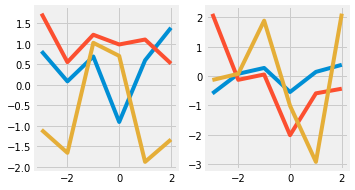

In [90]:
fg, axs = plt.subplots(1, 2, figsize=(5, 3))

x_axis = np.arange(-3.0, 3.0, 1)

axs[0].plot(x_axis, normal_distribution(6, 0, 1))
axs[0].plot(x_axis, normal_distribution(6, 0.5, 1))
axs[0].plot(x_axis, normal_distribution(6, -0.5, 1))

axs[1].plot(x_axis, normal_distribution(6, 0, 0.5))
axs[1].plot(x_axis, normal_distribution(6, 0, 1))
axs[1].plot(x_axis, normal_distribution(6, 0, 1.5))

<a id="skewness"></a>
### 6.2  Skewness
- Skewness is a measure of the asymmetry of the distribution of a random variable about its mean.
- Skewness can be positive or negative, or even undefined.
- Notice that the mean, median, and mode are the same when there is no skew.

![skewness](./assets/images/skewness---mean-median-mode.jpg)

<a id="kurtosis"></a>
### 6.3 Kurtosis
- Kurtosis is a measure of whether the data are peaked or flat, relative to a normal distribution.
- Data sets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly, and have heavy tails. 

![kurtosis](./assets/images/kurtosis.jpg)

## Exercise

![](../assets/images/distributions.png)

(a) Use the `.hist()` function on your Titantic DataFrame to plot histograms of all the variables in your data. Set the figure size to (10,8) and the number of bins to 50. Your result should look something like this:

In [3]:
#titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


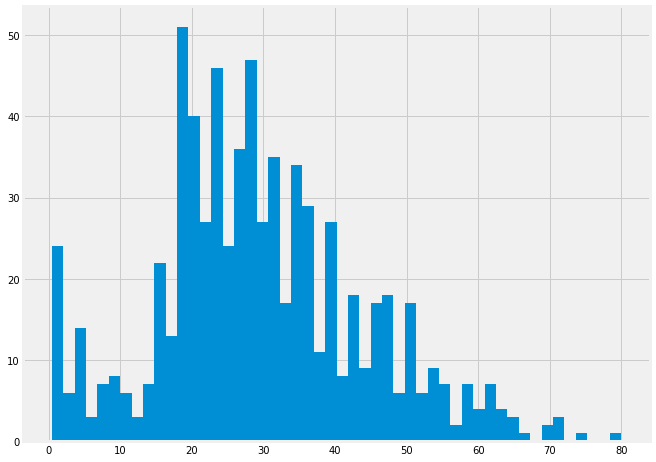

In [6]:
titanic['age'].hist(bins=50, figsize=(10, 8))

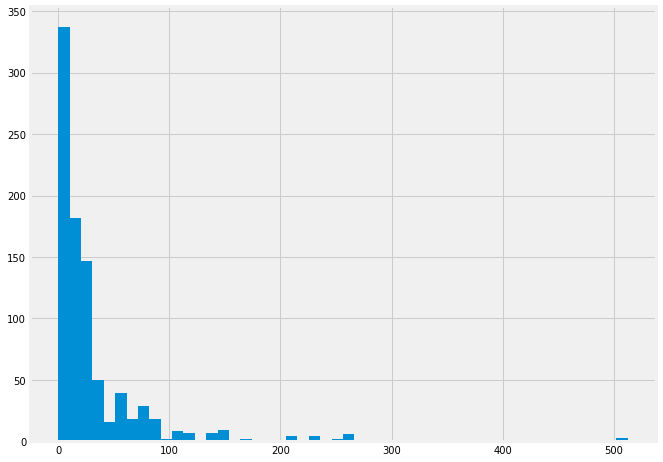

In [7]:
titanic['fare'].hist(bins=50, figsize=(10, 8))

(b) Use the built-in `.plot.box()` function on your Titanic DataFrame to plot box plots of your variables. Try using the keyword argument `showfliers`, e.g. `showfliers=False`.

What does the box plot show? 

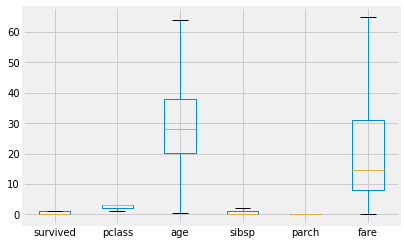

In [8]:
# Plotting all histograms can be unweildly, boxplots can be more concise
titanic.plot.box(showfliers=False);

(c) By visual inspection, are any of the variables in the Titanic dataset normally distributed?

'age' variable shows some normal distribution, positively skewed, so data peaks before mean age value.

<a id="topic-review"></a>
## Lesson Review
---

- We covered several different types of summary statistics
- We covered three different types of visualizations
- We've described bias and variance and why they are important.
- We've looked at some important characteristics of normal distributions